Mounting google drive to read files from drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


When getting an error "module 'cv2.cv2' has no attribute 'SIFT_create' "

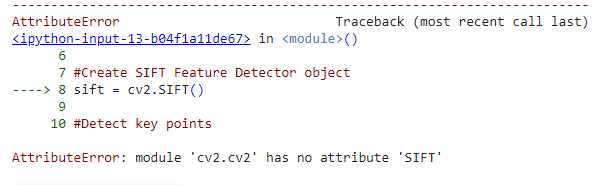

The first thing to do is see the exact version you are using, all just running:

print (cv2 .__ version__)

if version = 4.4.0 then sift = cv2.SIFT_create ()

if version = 4.3.x then sift = cv2.xfeatures2d.SIFT_create ()

if Version = 4.2.x or 4.1.xu 4.0.x, then SIFT will not work, it is not taken into consideration during the construction of the python package, the activation of the open-contrib module as well as the use of algorithms non free have not been activated.

on google colab you can install the opencv version you want by simply using a pip command preceded by an exclamation point "!" and specify the opencv version as follows:

!pip install opencv-contrib-python==4.4.0.44

In [21]:
import cv2
cv2.__version__

'4.1.2'

In [22]:
!pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7MB 72kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [3]:
import cv2
cv2.__version__

'4.4.0'

In [7]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
figsize = (10, 10)

#SIFT feature detection and description

In [48]:
img_1 = cv2.cvtColor(cv2.imread('/content/drive/My Drive/Uni Student/2021/DA/Practical 02/images/img1.jpg'), cv2.COLOR_BGR2RGB)
gray_1 = cv2.cvtColor(img_1, cv2.COLOR_RGB2GRAY)
img_2 = cv2.cvtColor(cv2.imread('/content/drive/My Drive/Uni Student/2021/DA/Practical 02/images/img3.jpg'), cv2.COLOR_BGR2RGB)
gray_2 = cv2.cvtColor(img_2, cv2.COLOR_RGB2GRAY)


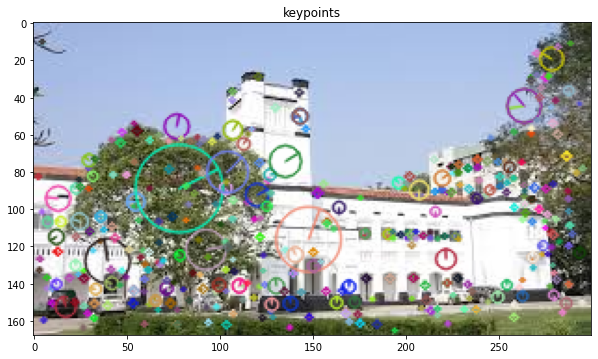

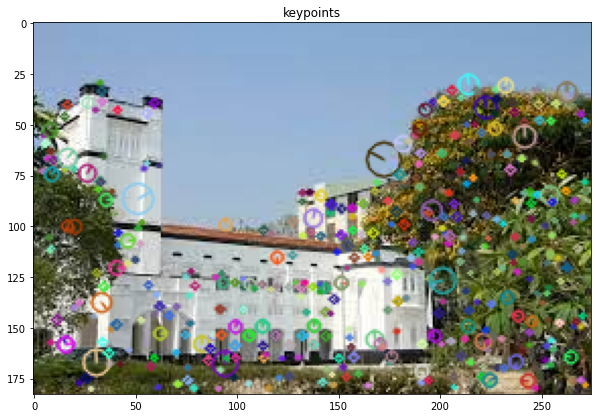

In [49]:
# use orb if sift is not installed
feature_extractor = cv2.SIFT_create()

# find the keypoints and descriptors with chosen feature_extractor
kp_1, desc_1 = feature_extractor.detectAndCompute(gray_1, None)
kp_2, desc_2 = feature_extractor.detectAndCompute(gray_2, None)

test = cv2.drawKeypoints(img_1, kp_1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
test2 = cv2.drawKeypoints(img_2, kp_2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=figsize)
plt.imshow(test)
plt.title("keypoints")
plt.show()

plt.figure(figsize=figsize)
plt.imshow(test2)
plt.title("keypoints")
plt.show()

# take only unique features


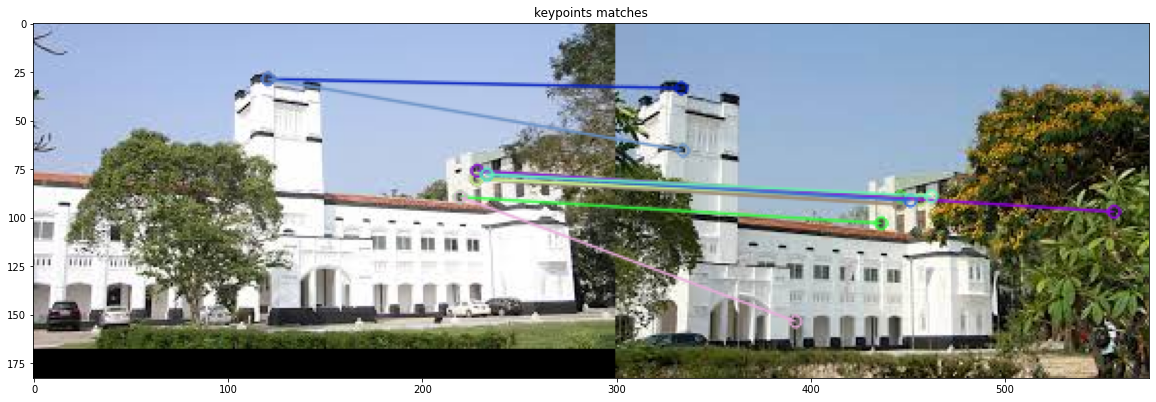

In [50]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_1, desc_2, k=2)

# Apply ratio test
good_match = []
for m in matches:
    if m[0].distance/m[1].distance < 0.5:
        good_match.append(m)
good_match_arr = np.asarray(good_match)

# show only 30 matches
im_matches = cv2.drawMatchesKnn(img_1, kp_1, img_2, kp_2,
                                good_match[0:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(20, 20))
plt.imshow(im_matches)
plt.title("keypoints matches")
plt.show()